# Lecture 7 - Debugging

As you have probably realized, the *writing* part of developing software is a relatively small portion of the overall time spent. Most of the time is thinking about the code you want to write and then testing it to see if you get the right output.

Developing strong debugging skills is actually *most important* part of becoming a competent programmer.

This lecture is going to cover some strategies for debugging when you write code.

![grace hopper](https://cdn-blog.adafruit.com/uploads/2017/09/DJS0u97W0AYf8BP.jpg)

On September 9th, 1947, Grace Hopper removed a moth from the Harvard Mark II, thereby removing the first ‘bug’ from a computer and giving rise to the terms bug & debugging that are essentially synonymous with programming today. (more [here](https://blog.adafruit.com/2017/09/13/the-first-computer-bug-recently-celebrated-its-70th-birthday/))

## Stages of debugging, according to Severance:

### Reading
Examine your code, read it back to yourself, and check that it says what you meant to say.

### Running
Experiment by making changes and running different versions. Often if you display the right thing at the right place in the program, the problem becomes obvious, but sometimes you have to spend some time to build scaffolding.

### Ruminating
Take some time to think! What kind of error is it: syntax, runtime, semantic? What information can you get from the error messages, or from the output of the program? What kind of error could cause the problem you're seeing? What did you change last, before the problem appeared?

### Retreating
At some point, the best thing to do is back off, undoing recent changes, until you get back to a program that works and that you understand. Then you can start rebuilding.


## Debugging with Print

Code is cheap to run, so don't be afraid to run your code even if it isn't finished! Running your partial code can provide a lot of opportunities to learn about how it is computing your data. One of the most basic ways of experimenting with code is to run the code and put `print` functions along the way to display the internal state of the system.

In the code cell below we have a function, `scan()`, that takes two argument. The first argument is a block of text in the form of a Python string that contains a bunch of text you wish to search. The second argument is a word, in the form of a string, you want to search for in the first argument, the block of text. The function will then return an integer number representing the number of times the second argument string appears in the first, that is, how many times does a particular word appear in a block of text.

The function below works just fine, but there is a bug that causes it to not always count words properly. Let's run the three code cells below to 
1. Define the function
2. Create a variable containing a block of text
3. Execute the function

In [ ]:
# define a function that will search a string of text for a given word
def scan(longText, givenWord):
    count = 0
    
    # split the text into a list of strings
    wordList = longText.split()
    
    # loop over every word in the wordList
    for word in wordList :
        # check to see if the current word in the loop is the search word
        if givenWord in word :
            count = count + 1
    
    
    return count

In [ ]:
# create a variable containing a big block of text about Maya Angelou
mayaText = '''
Maya Angelou was a civil rights activist, poet and award-winning author known for her acclaimed 1969 memoir, 'I Know Why the Caged Bird Sings,' and her numerous poetry and essay collections.
Who Was Maya Angelou?

Maya Angelou was an American author, actress, screenwriter, dancer, poet and civil rights activist best known for her 1969 memoir, I Know Why the Caged Bird Sings, which made literary history as the first nonfiction bestseller by an African American woman. Angelou received several honors throughout her career, including two NAACP Image Awards in the outstanding literary work (nonfiction) category, in 2005 and 2009. 

Early Life

Angelou was born on April 4, 1928, in St. Louis, Missouri. Angelou had a difficult childhood. Her parents split up when she was very young, and she and her older brother, Bailey, were sent to live with their father's mother, Anne Henderson, in Stamps, Arkansas.

As an African American, Angelou experienced firsthand racial prejudices and discrimination in Arkansas. She also suffered at the hands of a family associate around the age of 7: During a visit with her mother, Angelou was raped by her mother's boyfriend. As vengeance for the sexual assault, Angelou's uncles killed the boyfriend.

So traumatized by the experience, Angelou stopped talking. She returned to Arkansas and spent years as a virtual mute.

Education

During World War II, Angelou moved to San Francisco, California. There she won a scholarship to study dance and acting at the California Labor School.

Also during this time, Angelou became the first Black female cable car conductor — a job she held only briefly — in San Francisco.


Acting and Singing Career

In the mid-1950s, Angelou's career as a performer began to take off. She landed a role in a touring production of Porgy and Bess, later appearing in the off-Broadway production Calypso Heat Wave (1957) and releasing her first album, Miss Calypso (1957).

A member of the Harlem Writers Guild and a civil rights activist, Angelou organized and starred in the musical revue Cabaret for Freedom as a benefit for the Southern Christian Leadership Conference, also serving as the SCLC's northern coordinator.


In 1961, Angelou appeared in an off-Broadway production of Jean Genet's The Blacks with James Earl Jones, Lou Gossett Jr. and Cicely Tyson.

Angelou went on to earn a Tony Award nomination for her role in the play Look Away (1973) and an Emmy Award nomination for her work on the television miniseries Roots (1977), among other honors.
'''

In [ ]:
# run the scan function with the full text and count instances of the word "angelou"
scan(mayaText, "angelou")

Huh. You'd think a big block of text about Maya Angelou would return a result bigger than "0". In the above code we are not getting our intended result, since we know the word is clearly in the text.  What could be going on?

To start debugging our code, we should start by working with a smaller, more familiar data set with known values and then add some `print` functions to tell us about the internal state of the function. This is a common pattern when testing and debugging your code. When you add `print` statements, you typically don't want to process the entire data set because you will get way too much output!

So in the code cells below we will do the following.
1. Create a smaller datasets, a shorter string with known values.
2. Rewrite our `scan` function to include `print` out the internal variables as it processes the data.
3. Run our new, more expressive function with the smaller data set (i.e. shorter string).

In [ ]:
# create a shorter string of text for testing
shortText = "this is short text to test searching for Angelou"

In [ ]:
# define a new scan function that prints out its progress
def scan(longText, givenWord):
    count = 0
    
    # split the text into a list of strings
    wordList = longText.split()
    
    # loop over every word in the wordList
    for word in wordList :
        
        # debug output
        print("given word: " + givenWord)
        print ("word: " + word)
        
        # check to see if the current word in the loop is the search word
        if givenWord in word :
            count = count + 1
        
        # print out how many instances of givenWord we have seen
        print("current count: " + str(count))
    
    return count

In [ ]:
# run out newline defined scan function that will print debug output
scan(shortText, "angelou")

Ah! So if we look at the output for "given word" and "current word" we can see the issue. Capitalization! What if we want our scan function to ignore capitalization?? Maybe there are some [string methods](https://docs.python.org/3.8/library/stdtypes.html#string-methods) we can use to "normalize" the words to make the given word and the words in our long block of text comparable despite the case. I think the `lower()` method might be helpful.

In [ ]:
# define a new scan function that cleans up strings and prints out its progress
def scan(longText, givenWord):
    count = 0
    
    # split the text into a list of strings
    wordList = longText.split()
    
    # make the search term lowercase
    givenWord = givenWord.lower()
    
    # loop over every word in the wordList
    for word in wordList :
        
        # make the current word lowercase
        word = word.lower()
        
        # debug output
        print("given word: " + givenWord)
        print ("word: " + word)
        
        # check to see if the current word in the loop is the search word
        if givenWord in word :
            count = count + 1
        
        # print out how many instances of givenWord we have seen
        print("current count: " + str(count))
    
    return count

In [ ]:
# run out newline defined scan function that will print debug output
scan(shortText, "angelou")

It works! We saw one instance of the word "angelou" in our test string. So now we can use our function on the full Maya Angelo biography text, but first we should disable our debugging otherwise we will junk up the output. So the last step will be redefine our function one final time to comment out the print statements.

In [ ]:
# define a new scan function that cleans up strings and prints out its progress
def scan(longText, givenWord):
    count = 0
    
    # split the text into a list of strings
    wordList = longText.split()
    
    # make the search term lowercase
    givenWord = givenWord.lower()
    
    # loop over every word in the wordList
    for word in wordList :
        
        # make the current word lowercase
        word = word.lower()
        
        # debug output 
        #print("given word: " + givenWord)
        #print ("word: " + word)
        
        # check to see if the current word in the loop is the search word
        if givenWord in word :
            count = count + 1
        
        # print out how many instances of givenWord we have seen
        #print("current count: " + str(count))
    
    return count

Ok, now we can go back to our original, big, block of text and run our newly updated `scan` function to count instances of specific words.

In [ ]:
# run our new scan function on the full Maya Angelou text
scan(mayaText, "angelou")

In [ ]:
scan(mayaText, "the")

In [ ]:
scan(mayaText, "rights")

Great! Now we have a functional function!

## Exception Handling

Sometimes your code is going to *throw* an error. One example is you are processing some data or working with values and you don't always know if they are of the correct. The function below will add 1 to the inputs, but it isn't very robust. If you don't give it a numerical data type (`int` or `float`) it will yell at you.

In [29]:
# make a function that adds 1 to the argument
def add_one(num):
    return num + 1
# execute the function with a number
add_one(1)

2

In [30]:
# execute the function with bad data
add_one("One")

TypeError: can only concatenate str (not "int") to str

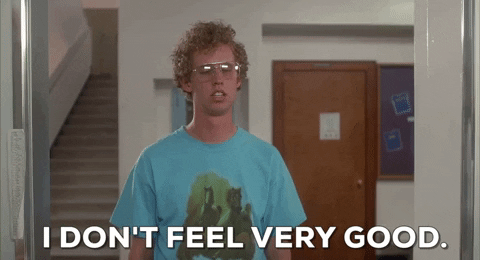

There is a conditional execution structure built into Python to handle expected and unexpected errors called "try / except". The idea of try and except is that you know that some sequence of instruction(s) may have a problem and you want to add some statements to be executed if an error occurs. These extra statements (the except block) are ignored if there is no error. 

Chuck Severance says you can think of the try and except feature in Python as an "insurance policy" on a sequence of statements.

In [31]:
# make our add_one function more robust
def add_one(num):
    # try adding 1 to the input
    try:
        return num + 1
    
    # run this code if Python complains
    except:
        # display an error message and return nothing
        print("You didn't input a number")
        return None

# execute our function with good data
add_one(1)

2

In [32]:
# execute our function with bad data
add_one("one")

You didn't input a number


Look ma! No Python error! The program executed correctly and handled the bad inputs gracefully.

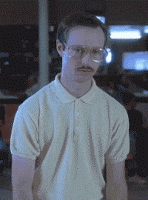

You can think about `try/except` as a kind of `if` statement but for controlling the flow of errors. Here is another example of the `try/except` structure for converting Fahrenheit to Celsius. The problem, as above, is the input value is the wrong data type so we get the error.

In [34]:
fahrenheit = '32'
celsius = (fahrenheit - 32.0) * 5.0 / 9.0
print(celsius)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In the above code, we get an error because the code is trying to perform math on a variable that we have created as string. The arrow in the error message above tells us what line of code is broken. This is a good hint for what code we should put within our `try` block. Then we can add an `except` block that executes if the `try` block throws an error.

In [ ]:
fahrenheit = '32'
try:
    celsius = (fahrenheit - 32.0) * 5.0 / 9.0
    print(cel)
except:
    print('Input needs to be a variable that is an integer or a float')

We can use a try/except block to "try" to run the code and if it does work, wr can print an error message as the "exception."

Sometime we want to run over the error, as above... sometimes we may actually want to generate an error message to inform us/other programmers that the code we wrote is being used incorrectly.  We can do this with an assert keyword:

In [35]:
inp = '32'
assert (type(inp) == float or type(inp) == int), 'The input needs to be a float or an int'
cel = (inp - 32.0) * 5.0 / 9.0
print(cel)

AssertionError: The input needs to be a float or an int

Think of `try/except` or `assert` as `if` statements that check for runtime errors.

In [ ]:
inp = '32'
if not (type(inp) == float or type(inp) == int) :
    raise TypeError("The input needs to be a float or an int")
cel = (inp - 32.0) * 5.0 / 9.0
print(cel)

### Finally....
try catch also has a "finally".  This is "on the way out" code that goes really well with loops.  As in, keep doing something until you get an exception and when you do, that's the end of the program so do something to finish up.

In [ ]:
fileHandle = open('files/myFile.txt', mode='r')

In [ ]:
fileHandle.write("Using reader mode to write is no beuno")

In [ ]:
fileHandle = open('files/myFile.txt', mode='r')

try :
     fileHandle.write("Using reader mode to write is no beuno")   
        
finally :
    fileHandle.close()
    print("closed the file")

In [ ]:
fileHandle = open('files/myFile.txt', mode='r')

try :
     fileHandle.write("Using reader mode to write is no beuno")   

except :
    print("there was a problem with writing to the file")

finally :
    fileHandle.close()
    print("closed the file")

### With (the all powerful)

With is a fun way to wrap up the try / finally except:


In [ ]:
with open('files/myFile.txt', mode='w') as fileHandleUsingWhile :
    fileHandleUsingWhile.write("Using reader mode to write is no beuno") 

In [ ]:
for line in fileHandleUsingWhile :
    print(line)